In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

import xgboost 
from sklearn import set_config
set_config(transform_output="pandas")
pd.set_option('display.max_columns', 500)

In [2]:
from db.database_mysql import engine

film = pd.read_sql_query('''SELECT 
                              copies,
                              YEAR(date) AS year, 
                              MONTH(date) AS month, 
                              DAY(date) AS day, 
                              director, distributor, casting, duration, country, genre
                            FROM functionalities_filmscrap
                            -- LIMIT 1
                         ''', engine)



In [3]:
leroy = pd.DataFrame({ # 204366
    'year': [2024],
    'day': [10],
    'month': [4],
    'duration': [6120],
    'country': ['france'],
    'copies': [414],
    'genre': [['comedie']],
    'director': ['"florent bernard"'],
    'distributor': [["nolita cinema", "tf1 studio", "apollo films"]],
    'casting': [["charlotte gainsbourg", "jose garcia", "lily aubry"]],
})

sos = pd.DataFrame({ # 308185
    'year': [2024],
    'day': [10],
    'month': [4],
    'duration': [6960],
    'country': ['etatsunis'],
    'copies': [670],
    'genre': [['action']],
    'director': ['"Gil Kenan"'],
    'distributor': [["sony pictures releasing france"]],
    'casting': [["paulrudd", "dan aykroyd", "bill murray"]],
})

panda = pd.DataFrame({
    'year': [2024],
    'day': [27],
    'month': [3],
    'duration': [5640],
    'country': ['etatsunis'],
    'copies': [696],
    'genre': [['animation']],
    'director': ['"mike mitchell"'],
    'distributor': [["universal pictures"]],
    'casting': [["jack black"]],
})

regne = pd.DataFrame({ # 224476
    'year': [2023],
    'day': [4],
    'month': [10],
    'copies': [427],
    'duration': [7680],
    'country': ['france'],
    'genre': [['aventure', 'drame', 'horreur']],
    'director': ['"thomas cailley"'],
    'distributor': [["nordouest films", "studio canal", "france 2 cinema"]],
    'casting': [["romain duris", "paul kircher", "adele exarchopoulos"]],
})

argile = pd.DataFrame({ # 15574
    'year': [2024],
    'day': [24],
    'month': [1],
    'copies': [55],
    'duration': [5640],
    'country': ['france'],
    'genre': [['drame', 'romantique']],
    'director': ['"anais tellenne"'],
    'distributor': [["koro films", "vagabonds films", "micro climat"]],
    'casting': [["raphael thiery", "emmanuelle devos", "mariechristine orry"]],
})

In [4]:
from joblib import load

pipe_transform = load('./modelisation/pipe_transform.pkl')
pipe_prepocess = load('./modelisation/pipe_prepocess.pkl')
model = load('./modelisation/model.pkl')

# f = pd.DataFrame.from_dict(dict(film))
f = leroy
film_transformed = pipe_transform.transform(f)
film_transformed = pipe_prepocess.transform(film_transformed)

pred = model.predict(film_transformed)

/Volumes/DD 250/dev/_simplon/film_predict/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


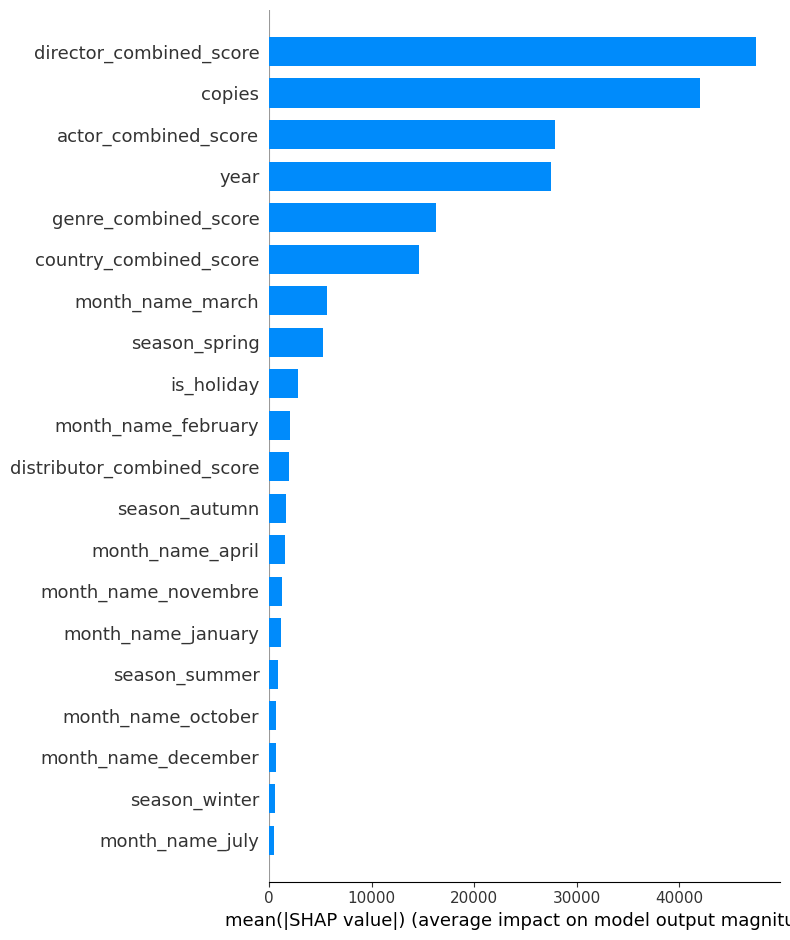

In [5]:
import shap
shap.initjs()

# Fits the explainer
explainer = shap.TreeExplainer(model)
observations = film_transformed
#display(observations)
shap_values = explainer.shap_values(observations)
shap_values_explainer = explainer(observations)
shap.summary_plot(shap_values, observations, plot_type="bar")



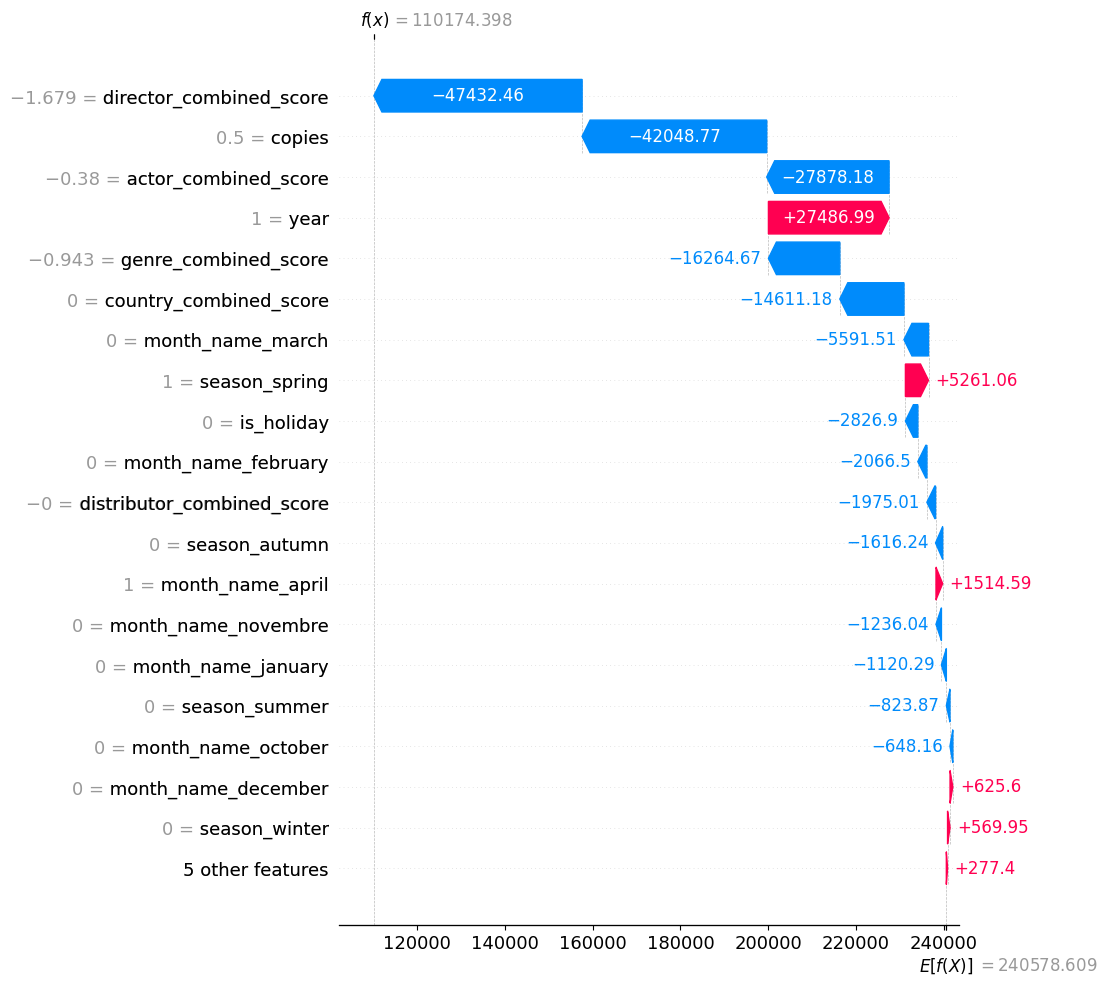

In [6]:
shap.plots.waterfall(shap_values_explainer[0], max_display=20)

In [7]:
shap.plots.heatmap(shap_values_explainer)

ValueError: The number of observations cannot be determined on an empty distance matrix.

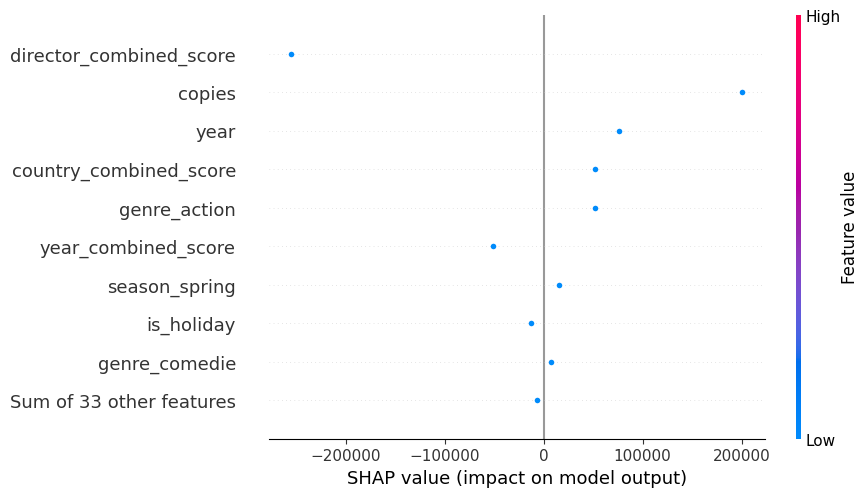

In [ ]:
shap.plots.beeswarm(shap_values_explainer)